In [32]:
import pandas as pd
df = pd.read_csv("Sample - Superstore.csv", encoding='ISO-8859-1')
df.head()



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [2]:
df.dtypes



Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [3]:
df.shape


(9994, 21)

In [4]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [56]:
df.isnull().sum()


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Month            0
dtype: int64

In [59]:
import pandas as pd
import sqlite3 as sql
import time
from pathlib import Path

In [65]:
DATA_CSV="Cleaned_Superstore.csv"
DB_FILE = "superstore.db"
OUT_DIR = "sql_outputs"
Path(OUT_DIR).mkdir(exist_ok=True)

In [67]:
df = pd.read_csv(DATA_CSV, encoding='utf-8')
df.columns= [c.strip().replace('-','_').replace(' ','_') for c in df.columns]

In [69]:
df['Order_Date']=pd.to_datetime(df['Order_Date']).dt.strftime('%Y-%m-%d')
                            

In [72]:
conn=sql.connect(DB_FILE)
df.to_sql("superstore_sales",conn, if_exists="replace", index=False)

9994

In [90]:
query_data="SELECT * FROM superstore_sales LIMIT 10"
full_data=pd.read_sql(query_data,conn)
print(full_data)

   Row_ID        Order_ID  Order_Date   Ship_Date       Ship_Mode Customer_ID  \
0       1  CA-2016-152156  2016-11-08  2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156  2016-11-08  2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688  2016-06-12  2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966  2015-10-11  2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966  2015-10-11  2015-10-18  Standard Class    SO-20335   
5       6  CA-2014-115812  2014-06-09  2014-06-14  Standard Class    BH-11710   
6       7  CA-2014-115812  2014-06-09  2014-06-14  Standard Class    BH-11710   
7       8  CA-2014-115812  2014-06-09  2014-06-14  Standard Class    BH-11710   
8       9  CA-2014-115812  2014-06-09  2014-06-14  Standard Class    BH-11710   
9      10  CA-2014-115812  2014-06-09  2014-06-14  Standard Class    BH-11710   

     Customer_Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  

In [92]:
Total_sales = "SELECT SUM(Sales) AS Total_Sales FROM superstore_sales"
print(pd.read_sql(query_sales, conn))

    Total_Sales
0  2.297201e+06


In [93]:
Total_profit= "SELECT SUM(Profit) FROM superstore_sales"
print(pd.read_sql(Total_profit,conn))


   SUM(Profit)
0  286397.0217


In [120]:
def run(name,sql):
    t0=time.time()
    res=pd.read_sql(sql,conn)
    t1=time.time()
    print(f"[{name}] rows={len(res)} time={t1-t0:.3f}s")
    print(pd.read_sql(query_category, conn))
    res.to_csv(f"{OUT_DIR}/{name}.csv",index=False)
    return res

In [122]:
query_category = """
SELECT Category, Sub_Category, SUM(Sales) AS Sales
FROM superstore_sales
GROUP BY Category, Sub_Category
ORDER BY Sales DESC
"""
run("Sales_By_Category",query_category)



[Sales_By_Category] rows=17 time=0.014s


,Category,Sub_Category,Sales
0,Technology,Phones,330007.0540
1,Furniture,Chairs,328449.1030
2,Office Supplies,Storage,223843.6080
3,Furniture,Tables,206965.5320
4,Office Supplies,Binders,203412.7330
5,Technology,Machines,189238.6310
6,Technology,Accessories,167380.3180
7,Technology,Copiers,149528.0300
8,Furniture,Bookcases,114879.9963
9,Office Supplies,Appliances,107532.1610


In [104]:
query_top_customers = """
SELECT Customer_Name, SUM(Sales) AS Sales
FROM superstore_sales
GROUP BY Customer_Name
ORDER BY Sales DESC
LIMIT 5
"""
print(pd.read_sql(query_top_customers, conn))

   Customer_Name      Sales
0    Sean Miller  25043.050
1   Tamara Chand  19052.218
2   Raymond Buch  15117.339
3   Tom Ashbrook  14595.620
4  Adrian Barton  14473.571


In [126]:
query_loss_subcategories="""SELECT Category, Sub_Category,
SUM(Profit) AS TotalProfit
FROM superstore_sales
GROUP BY Sub_Category
ORDER BY TotalProfit ASC
LIMIT 5"""
run("Loss making Subcategories",query_loss_subcategories)


[Loss making Subcategories] rows=5 time=0.015s


,Category,Sub_Category,TotalProfit
0,Furniture,Tables,-17725.4811
1,Furniture,Bookcases,-3472.5560
2,Office Supplies,Supplies,-1189.0995
3,Office Supplies,Fasteners,949.5182
4,Technology,Machines,3384.7569


In [125]:
monthly_trend="""SELECT 
    strftime('%Y-%m', Order_Date) AS Month,
    ROUND(SUM(Sales), 2) AS Total_Sales
FROM superstore_sales
GROUP BY Month
ORDER BY Month;"""
run("Monthly Trend",monthly_trend)

[Monthly Trend] rows=48 time=0.015s


,Month,Total_Sales
0,2014-01,14236.90
1,2014-02,4519.89
2,2014-03,55691.01
3,2014-04,28295.35
4,2014-05,23648.29
5,2014-06,34595.13
6,2014-07,33946.39
7,2014-08,27909.47
8,2014-09,81777.35
9,2014-10,31453.39


In [124]:
top_10_customers="""SELECT 
    Customer_Name,
    ROUND(SUM(Sales), 2) AS Total_Sales
FROM superstore_sales
GROUP BY Customer_Name
ORDER BY Total_Sales DESC
LIMIT 10;"""
run("Top 10 Customers",top_10_customers)


[Top 10 Customers] rows=10 time=0.012s


,Customer_Name,Total_Sales
0,Sean Miller,25043.05
1,Tamara Chand,19052.22
2,Raymond Buch,15117.34
3,Tom Ashbrook,14595.62
4,Adrian Barton,14473.57
5,Ken Lonsdale,14175.23
6,Sanjit Chand,14142.33
7,Hunter Lopez,12873.30
8,Sanjit Engle,12209.44
9,Christopher Conant,12129.07


In [123]:
profit_margin="""SELECT 
    Category, Sub_Category,
    ROUND(SUM(Profit) / SUM(Sales) * 100, 2) AS Profit_Margin_Percent
FROM superstore_sales
GROUP BY Category,Sub_Category
ORDER BY Profit_Margin_Percent DESC;"""
run("Profit Margin Percentage",profit_margin)


[Profit Margin Percentage] rows=17 time=0.016s


,Category,Sub_Category,Profit_Margin_Percent
0,Office Supplies,Labels,44.42
1,Office Supplies,Paper,43.39
2,Office Supplies,Envelopes,42.27
3,Technology,Copiers,37.20
4,Office Supplies,Fasteners,31.40
5,Technology,Accessories,25.05
6,Office Supplies,Art,24.07
7,Office Supplies,Appliances,16.87
8,Office Supplies,Binders,14.86
9,Furniture,Furnishings,14.24


In [110]:
df[df["Profit"]<0]

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Order_Month,Order_Year,Order_Month_Year,Ship_Delay_(Days)
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,2015-10,7
14,15,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580,11,2015,2015-11,4
15,16,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,-3.8160,11,2015,2015-11,4
23,24,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,Pennsylvania,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196,7,2017,2017-07,2
27,28,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,Pennsylvania,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522,9,2015,2015-09,4
28,29,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,Pennsylvania,19140,East,OFF-BI-10000474,Office Supplies,Binders,Avery Recycled Flexi-View Covers for Binding S...,9.6180,2,0.70,-7.0532,9,2015,2015-09,4
32,33,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,Pennsylvania,19140,East,OFF-BI-10001525,Office Supplies,Binders,"Acco Pressboard Covers with Storage Hooks, 14 ...",6.8580,6,0.70,-5.7150,9,2015,2015-09,4
36,37,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,Texas,75080,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.9200,5,0.60,-147.9630,12,2016,2016-12,2
38,39,CA-2015-117415,2015-12-27,2015-12-31,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,Texas,77041,Central,FUR-BO-10002545,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",532.3992,3,0.32,-46.9764,12,2015,2015-12,4
39,40,CA-2015-117415,2015-12-27,2015-12-31,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,Texas,77041,Central,FUR-CH-10004218,Furniture,Chairs,"Global Fabric Manager's Chair, Dark Gray",212.0580,3,0.30,-15.1470,12,2015,2015-12,4


In [7]:
(df["Profit"]<0).sum()

1871

In [8]:
(df["Profit"] < 0).mean() * 100


18.721232739643785

In [9]:
df.duplicated().sum()

0

In [10]:
df["Order Date"]=pd.to_datetime(df["Order Date"])
df["Ship Date"]=pd.to_datetime(df["Ship Date"])

In [11]:
df[["Order Date","Ship Date"]].dtypes

Order Date    datetime64[ns]
Ship Date     datetime64[ns]
dtype: object

In [21]:
df["Order Month"]=df["Order Date"].dt.month

In [22]:
df["Order Month"] = df["Order Date"].dt.month
df["Order Year"] = df["Order Date"].dt.year
df["Order Month-Year"] = df["Order Date"].dt.to_period("M")


In [23]:
df["Ship Delay (Days)"] = (df["Ship Date"] - df["Order Date"]).dt.days


In [24]:
df.show()


AttributeError: 'DataFrame' object has no attribute 'show'

In [ ]:
df

In [116]:
df.isnull().sum()               # Final row/column count



Row_ID               0
Order_ID             0
Order_Date           0
Ship_Date            0
Ship_Mode            0
Customer_ID          0
Customer_Name        0
Segment              0
Country              0
City                 0
State                0
Postal_Code          0
Region               0
Product_ID           0
Category             0
Sub_Category         0
Product_Name         0
Sales                0
Quantity             0
Discount             0
Profit               0
Order_Month          0
Order_Year           0
Order_Month_Year     0
Ship_Delay_(Days)    0
dtype: int64

In [117]:
df.to_excel("Cleaned_Superstore.xlsx", index=False)


In [ ]:
df.to_csv("Cleaned_Superstore.csv", index=False)


In [ ]:
pip install seaborn


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline  
sns.set(style="whitegrid") 

In [ ]:
sns.barplot(x="Region", y="Profit",data=df)
plt.title("Profit by Region")
plt.show()


In [ ]:
sns.barplot(x="Region", y="Profit",data=df,estimator=sum,errorbar=None)
plt.title("Profit by Region")
plt.show()

In [ ]:
sns.barplot(x='Category', y='Profit', data=df, estimator=sum, errorbar=None)
plt.title("Profit by Category")
plt.show()


In [ ]:
plt.figure(figsize=(12,6))
subcat_order = df.groupby('Sub-Category')['Profit'].sum()
sns.barplot(x=subcat_order.index,y=subcat_order.values)
plt.xticks(rotation=45)
plt.title("Sub-catagory wise profit")
plt.show()



In [ ]:
monthly_sales=df.groupby('Order Month-Year')['Sales'].sum().reset_index()
monthly_sales['Order Month-Year'] = monthly_sales['Order Month-Year'].astype(str)

In [ ]:
plt.figure(figsize=(16,6))
sns.lineplot(x='Order Month-Year', y='Sales', data=monthly_sales, marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.show()


In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title("Discount vs Profit")
plt.show()


In [ ]:
total_sales=df['Sales'].sum()
total_profit=df['Profit'].sum()
total_orders=df['Order ID'].nunique()

In [ ]:
print(f"Total Sales:${total_sales:,.2f}")
print(f"Total Profit:${total_profit:,.2f}")
print(f"Total Orders:{total_orders}")

In [ ]:
profit_margin=(total_profit/total_sales)*100
print(f"Profit Margin: {profit_margin:.2f}%")

In [44]:
cat_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending=True)
print("Profit by Category:")
print(cat_profit)


Profit by Category:
Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64


In [45]:
subcat_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=True)
print("Profit by Sub-Category:")
print(subcat_profit)


Profit by Sub-Category:
Sub-Category
Tables        -17725.4811
Bookcases      -3472.5560
Supplies       -1189.0995
Fasteners        949.5182
Machines        3384.7569
Labels          5546.2540
Art             6527.7870
Envelopes       6964.1767
Furnishings    13059.1436
Appliances     18138.0054
Storage        21278.8264
Chairs         26590.1663
Binders        30221.7633
Paper          34053.5693
Accessories    41936.6357
Phones         44515.7306
Copiers        55617.8249
Name: Profit, dtype: float64


In [ ]:
print("Loss Making Sub-catagories:")
print(subcat_profit[subcat_profit<0])


In [ ]:
discount_profit = df.groupby('Discount')['Profit'].sum()
print("Profit by Discount:")
print(discount_profit)


In [41]:
sales_region=df.groupby('Region')['Sales'].sum().sort_values(ascending=True)
print("Sales By region:")
print(sales_region)

Sales By region:
Region
South      391721.9050
Central    501239.8908
East       678781.2400
West       725457.8245
Name: Sales, dtype: float64


In [42]:
profit_region=df.groupby('Region')['Profit'].sum().sort_values(ascending=True)
print("Profit By region")
print(profit_region)

Profit By region
Region
Central     39706.3625
South       46749.4303
East        91522.7800
West       108418.4489
Name: Profit, dtype: float64


In [43]:
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(5)
print("Top 5 Cities by Sales:")
print(top_cities)


Top 5 Cities by Sales:
City
New York City    256368.161
Los Angeles      175851.341
Seattle          119540.742
San Francisco    112669.092
Philadelphia     109077.013
Name: Sales, dtype: float64


In [38]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Month']=df['Order Date'].dt.to_period('M').dt.to_timestamp()


In [39]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016-11-01
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016-11-01
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016-06-01
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015-10-01
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015-10-01


In [46]:
monthly_sales=df.groupby('Month')['Sales'].sum().reset_index()
monthly_sales.set_index('Month',inplace=True)

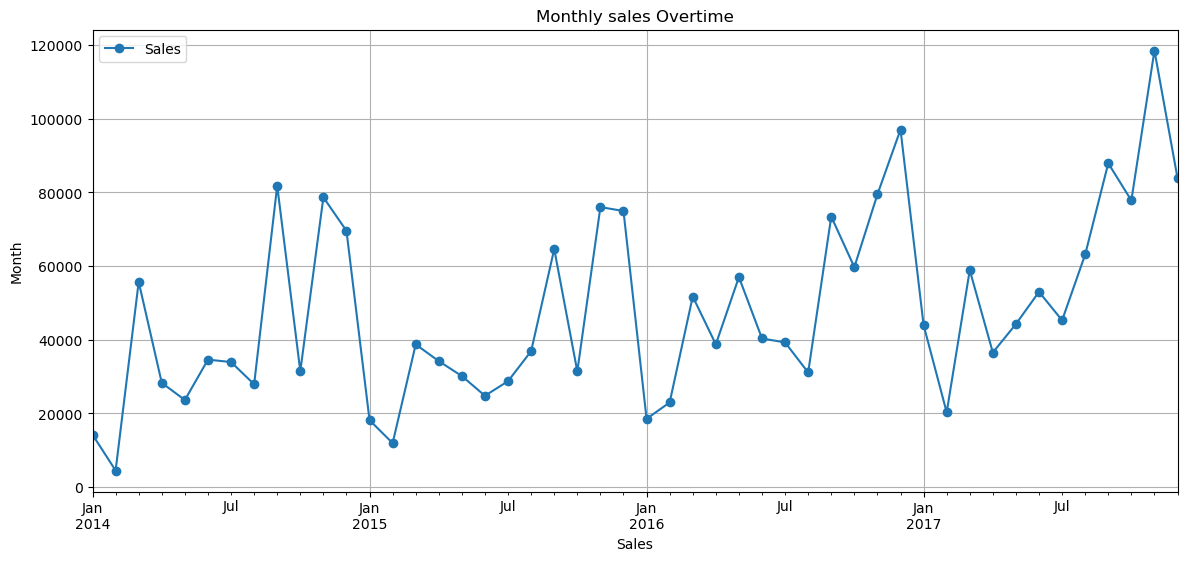

In [47]:
import matplotlib.pyplot as plt

monthly_sales.plot(figsize=(14,6),marker='o')
plt.title("Monthly sales Overtime")
plt.xlabel("Sales")
plt.ylabel("Month")
plt.grid(True)
plt.show()

    

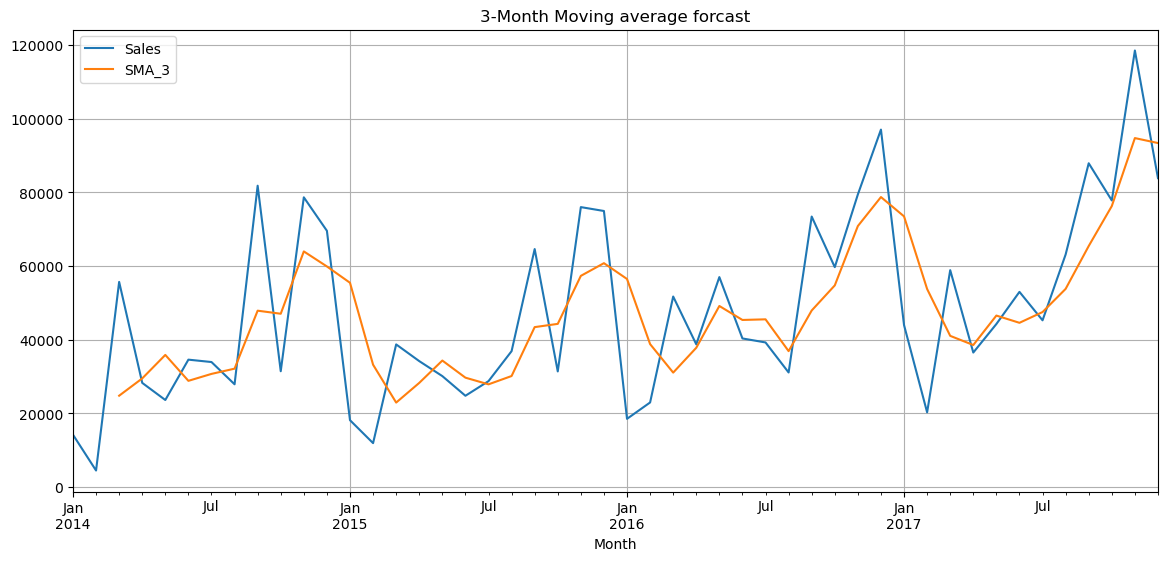

In [48]:
monthly_sales['SMA_3']=monthly_sales['Sales'].rolling(window=3).mean()
monthly_sales[['Sales','SMA_3']].plot(figsize=(14,6))
plt.title("3-Month Moving average forcast")
plt.grid(True)

In [49]:
last_3=monthly_sales['Sales'].iloc[-3:]
next_month_forcast=last_3.mean()
print(f" Predicted sales for next month:{next_month_forcast:,.2f}")

 Predicted sales for next month:93,351.36


In [50]:
 from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model=SimpleExpSmoothing(monthly_sales['Sales']).fit()
future_forecast=model.forecast(3)
print("Forcast the sales of next 3 months")
print(future_forecast)

Forcast the sales of next 3 months
2018-01-01    84558.210839
2018-02-01    84558.210839
2018-03-01    84558.210839
Freq: MS, dtype: float64


C:\Users\gargv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\gargv\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [51]:
 from statsmodels.tsa.holtwinters import Holt

model=Holt(monthly_sales['Sales']).fit()
future_forecast=model.forecast(12)
print("Forcast the sales of next 3 months")
print(future_forecast)

Forcast the sales of next 3 months
2018-01-01     96619.340766
2018-02-01    100032.923620
2018-03-01    103446.506473
2018-04-01    106860.089327
2018-05-01    110273.672181
2018-06-01    113687.255034
2018-07-01    117100.837888
2018-08-01    120514.420742
2018-09-01    123928.003596
2018-10-01    127341.586449
2018-11-01    130755.169303
2018-12-01    134168.752157
Freq: MS, dtype: float64


C:\Users\gargv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\gargv\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [52]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model=ExponentialSmoothing(monthly_sales['Sales'],trend='add',seasonal='add',seasonal_periods=12).fit()
future_forcast=model.forecast(12)
print("Holt winters Forecast with trend and seasonality")
print(future_forecast)

Holt winters Forecast with trend and seasonality
2018-01-01     96619.340766
2018-02-01    100032.923620
2018-03-01    103446.506473
2018-04-01    106860.089327
2018-05-01    110273.672181
2018-06-01    113687.255034
2018-07-01    117100.837888
2018-08-01    120514.420742
2018-09-01    123928.003596
2018-10-01    127341.586449
2018-11-01    130755.169303
2018-12-01    134168.752157
Freq: MS, dtype: float64


C:\Users\gargv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\gargv\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [53]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model=ExponentialSmoothing(monthly_sales['Sales'],trend='add',seasonal='add',seasonal_periods=6).fit()
future_forcast=model.forecast(12)
print("Holt winters Forecast with trend and seasonality")
print(future_forecast)
print(monthly_sales.shape[0])

Holt winters Forecast with trend and seasonality
2018-01-01     96619.340766
2018-02-01    100032.923620
2018-03-01    103446.506473
2018-04-01    106860.089327
2018-05-01    110273.672181
2018-06-01    113687.255034
2018-07-01    117100.837888
2018-08-01    120514.420742
2018-09-01    123928.003596
2018-10-01    127341.586449
2018-11-01    130755.169303
2018-12-01    134168.752157
Freq: MS, dtype: float64
48


C:\Users\gargv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\gargv\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


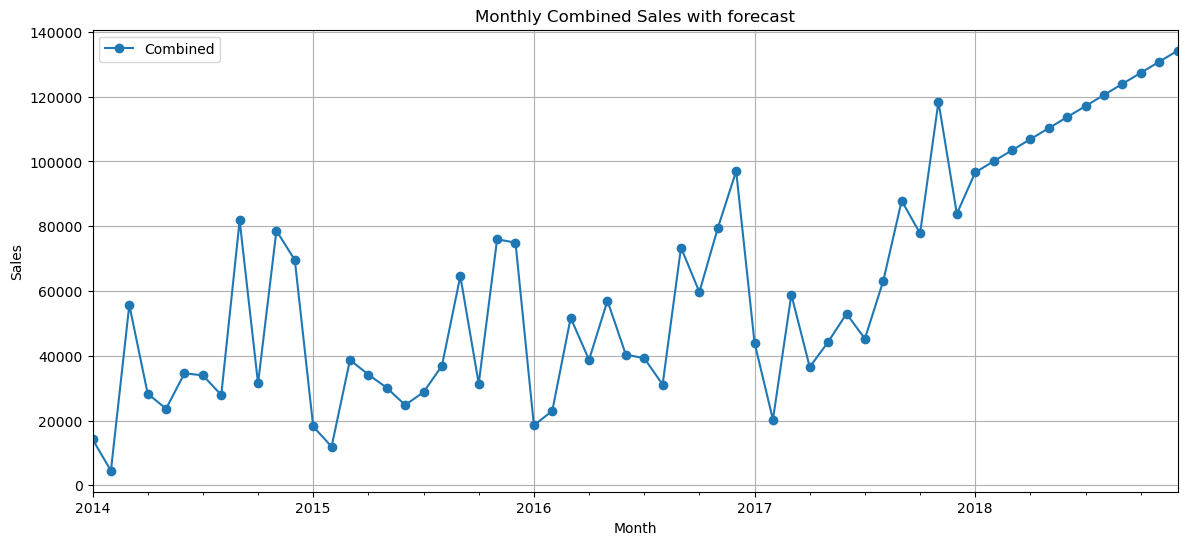

In [54]:
full=pd.concat([monthly_sales['Sales'],future_forecast])
full.plot(figsize=(14,6),marker='o',linestyle="-",label="Combined")
plt.title("Monthly Combined Sales with forecast")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True)
plt.legend()
plt.show()

In [55]:
profit_by_customer=df.groupby("Customer Name")['Profit'].sum().sort_values(ascending=False)
print(profit_by_customer)

Customer Name
Tamara Chand      8981.3239
Raymond Buch      6976.0959
Sanjit Chand      5757.4119
Hunter Lopez      5622.4292
Adrian Barton     5444.8055
                    ...    
Henry Goldwyn    -2797.9635
Sharelle Roach   -3333.9144
Luke Foster      -3583.9770
Grant Thornton   -4108.6589
Cindy Stewart    -6626.3895
Name: Profit, Length: 793, dtype: float64


In [34]:
profit_by_customer.head(10)

Customer Name
Tamara Chand            8981.3239
Raymond Buch            6976.0959
Sanjit Chand            5757.4119
Hunter Lopez            5622.4292
Adrian Barton           5444.8055
Tom Ashbrook            4703.7883
Christopher Martinez    3899.8904
Keith Dawkins           3038.6254
Andy Reiter             2884.6208
Daniel Raglin           2869.0760
Name: Profit, dtype: float64

In [128]:
profit_by_customer.tail(10)

Customer Name
Natalie Fritzler   -1695.9714
Christine Phan     -1850.3029
Sean Miller        -1980.7393
Sean Braxton       -2082.7451
Nathan Cano        -2204.8072
Henry Goldwyn      -2797.9635
Sharelle Roach     -3333.9144
Luke Foster        -3583.9770
Grant Thornton     -4108.6589
Cindy Stewart      -6626.3895
Name: Profit, dtype: float64